# 1. Load everything required

In [1]:
import numpy as np
import pandas as pd
from pycoingecko import CoinGeckoAPI
import os
import panel as pn
pn.extension('plotly')
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
import inquirer
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import hvplot.pandas

import requests
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
style.use('ggplot')

C:\Users\josep\anaconda3\envs\uncc\lib\site-packages\blessed\terminal.py:188: UserWarning: Failed to setupterm(kind='xterm-color'): Could not find terminal xterm-color
  warnings.warn(msg)


# 2. Data Gathering for SNJ Index from Yahoo! Data
### Setting the dates, getting the crpto index values, creating the portfolio data, testing data returned

In [2]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2021, 4, 8) 

btc_p = web.DataReader('BTC-USD', 'yahoo', start, end) ['Close']
eth_p = web.DataReader('ETH-USD', 'yahoo', start, end) ['Close']
ltc_p = web.DataReader('LTC-USD', 'yahoo', start, end) ['Close']
link_p = web.DataReader('LINK-USD', 'yahoo', start, end) ['Close']
xrp_p = web.DataReader('XRP-USD', 'yahoo', start, end) ['Close']
trx_p = web.DataReader('TRX-USD', 'yahoo', start, end) ['Close']

# 3. Charting the SNJ Cryptos
### Using Yahoo! data to build charts for dashboad

In [141]:
#1. choose+crypto will be to ONLY take 1 crypto AND get current price
#2. apply results of sim aggregate "AVG Daily Pct.Change" * that price
#Choose_crypto = input()
prices = ((btc_p.pct_change()+eth_p.pct_change()+ltc_p.pct_change()+link_p.pct_change()+xrp_p.pct_change()+trx_p.pct_change())/6).round(4)
prices_4 = (btc_p + eth_p + ltc_p + xrp_p)
prices_test = ((btc_p + eth_p + ltc_p + xrp_p)/4)
#prices = abs(price2/6
#prices = xrp_p
combined_df=['btc_p', 'eth_p',  'ltc_p', 'xrp_p']
prices_5 = [btc_p, eth_p,  ltc_p, xrp_p]
returns = prices.pct_change()

#Crypto price history charts
btc_price = btc_p.hvplot.line('Bitcoin Average Close for day', label='BTC Price History', legend = True)
eth_price = eth_p.hvplot.line('Ethereum Average Close for day', label='ETH Prices', legend = True)
ltc_price = ltc_p.hvplot.line('Litecoin Average Close for day', label='LTC Prices', legend = True)
link_price = link_p.hvplot.line('Chainlink Average Close for day', label='LINK Prices', legend = True)
xrp_price = xrp_p.hvplot.line('Ripple Average Close for day', label='XRP Prices', legend = True)
trx_price = trx_p.hvplot.line('Tron Average Close for day', label='TRX Prices', legend = True)

# Crypto percent change charts
btc_percent= btc_p.pct_change().hvplot.line(title='Bitcoin Daily % Change',ylabel='The average % daily change', legend = True).opts(width=400, )
eth_percent= eth_p.pct_change().hvplot.line(title='Ethereum Daily % Change',ylabel='The average % daily change', legend = True).opts(width=400, )
ltc_percent= ltc_p.pct_change().hvplot.line(title='Ethereum Daily % Change',ylabel='The average % daily change', legend = True).opts(width=400, )
link_percent= link_p.pct_change().hvplot.line(title='Ethereum Daily % Change',ylabel='The average % daily change', legend = True).opts(width=400, )
xrp_percent= xrp_p.pct_change().hvplot.line(title='Ethereum Daily % Change',ylabel='The average % daily change', legend = True).opts(width=400, )
trx_percent= trx_p.pct_change().hvplot.line(title='Ethereum Daily % Change',ylabel='The average % daily change', legend = True).opts(width=400, )

#Test chart load
btc_percent


:Curve   [Date]   (Close)

# 3.b. Building Data from Coingecko Data

In [4]:
#Loading CG API
cg = CoinGeckoAPI("https://api.coingecko.com/api/v3/")
#Test CG API
cg

In [5]:
# Testing CG data
cg.get_price(ids=['bitcoin', 'litecoin', 'ethereum', 'theta-token', 'vechain', 'chainlink'], vs_currencies='usd', history=90, days='365')

{'vechain': {'usd': 0.251378},
 'litecoin': {'usd': 323.49},
 'bitcoin': {'usd': 61981},
 'ethereum': {'usd': 2485.27},
 'chainlink': {'usd': 43.47},
 'theta-token': {'usd': 14.43}}

In [267]:
# Building CG Dataframes for charting
gecko_list = [
    "bitcoin",
    "ethereum",
    "litecoin",  
    "chainlink",
    "ripple",
    "tron",
]
############################
#df_cyptocurrency = pd.concat(frame_list,axis=1).sort_index()
#df_cyptocurrency 

#3 year period
timePeriod =463 

data = {}
for coin in gecko_list:
    try:
        nested_lists = cg.get_coin_market_chart_by_id(
            id=coin, vs_currency="usd", days=timePeriod
        )["prices"]
        data[coin] = {}
        data[coin]["timestamps"], data[coin]["values"] = zip(*nested_lists)

    except Exception as e:
        print(e)
        print("coin: " + coin)

frame_list = [
    pd.DataFrame(data[coin]["values"], index=data[coin]["timestamps"], columns=[coin])
    for coin in gecko_list
    if coin in data
]

df_cyptocurrency = pd.concat(frame_list,axis=1).sort_index()
df_cyptocurrency 

###################################
df_cyptocurrency["datetime"] = pd.to_datetime(df_cyptocurrency.index, unit="ms")
df_cyptocurrency["date"] = df_cyptocurrency["datetime"].dt.date
df_cyptocurrency["hour"] = df_cyptocurrency["datetime"].dt.hour

####################################

df_cyptocurrency = df_cyptocurrency.melt(
    id_vars=["datetime", "date", "hour"], var_name="currency_name", ignore_index=True
)
#Test dataframe
df_cyptocurrency

datetime        date  hour currency_name        value
0    2020-01-11 00:00:00  2020-01-11     0       bitcoin  8180.513170
1    2020-01-12 00:00:00  2020-01-12     0       bitcoin  8012.085782
2    2020-01-13 00:00:00  2020-01-13     0       bitcoin  8171.401185
3    2020-01-14 00:00:00  2020-01-14     0       bitcoin  8110.647965
4    2020-01-15 00:00:00  2020-01-15     0       bitcoin  8801.871213
...                  ...         ...   ...           ...          ...
2809 2021-04-17 02:59:54  2021-04-17     2          tron          NaN
2810 2021-04-17 03:00:10  2021-04-17     3          tron          NaN
2811 2021-04-17 04:48:08  2021-04-17     4          tron          NaN
2812 2021-04-17 04:48:29  2021-04-17     4          tron     0.170072
2813 2021-04-17 04:49:02  2021-04-17     4          tron          NaN

[2814 rows x 5 columns]

In [268]:
#Rename column names for charts
#We want the names to display a little better

new_df_cyptocurrency = pd.DataFrame(df_cyptocurrency)
print("\Before modifying name column:\n", df_cyptocurrency.columns)
new_df_cyptocurrency.rename(columns = {'currency_name' : 'Crypto Name'}, inplace = True)
print("\nAfter modifying name column:\n", new_df_cyptocurrency.columns)

\Before modifying name column:
 Index(['datetime', 'date', 'hour', 'currency_name', 'value'], dtype='object')

After modifying name column:
 Index(['datetime', 'date', 'hour', 'Crypto Name', 'value'], dtype='object')


In [269]:
#Charting cryptos with CG data
crypto_index_chart=df_cyptocurrency.hvplot.line('date','value', groupby='Crypto Name', title = 'Crypto Price History: 463 Days', width=600,widget_location='bottom',)
crypto_index_chart

Column
    [0] HoloViews(DynamicMap, widget_location='bottom')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='Crypto Name', options=['bitcoin', 'ethereum', ...], value='bitcoin', width=250)
        [2] HSpacer()

# 4. SNJ Headed to Monte Carlo

In [265]:
import fix_yahoo_finance as yf

df2 = yf.download("BTC-USD ETH-USD LTC-USD LINK-USD XRP-USD TRX-USD", start="2020-01-01", end="2021-04-08",group_by="close")
#print(df2)
#print(df2.BTC-USD)
df2.pct_change().head(100).dropna()

[*********************100%***********************]  6 of 6 downloaded


ETH-USD                                                    \
                Open      High       Low     Close Adj Close    Volume   
Date                                                                     
2020-01-02  0.009180 -0.015206 -0.017415 -0.025917 -0.025917  0.012284   
2020-01-03 -0.026066  0.028512 -0.003623  0.053057  0.053057  0.304273   
2020-01-04  0.053057  0.011148  0.051783  0.006708  0.006708 -0.290731   
2020-01-05  0.006708  0.024697  0.015108  0.008958  0.008958  0.012888   
2020-01-06  0.009180  0.035292  0.007627  0.058849  0.058849  0.208202   
...              ...       ...       ...       ...       ...       ...   
2020-04-05  0.021375  0.005159  0.014131 -0.011500 -0.011500 -0.055720   
2020-04-06 -0.011359  0.158352  0.010134  0.178265  0.178265  0.917950   
2020-04-07  0.177843  0.035033  0.143932 -0.023886 -0.023886  0.001061   
2020-04-08 -0.023116 -0.011358  0.001766  0.045669  0.045669 -0.212206   
2020-04-09  0.045510 -0.001790  0.021278 -0.010600 -0.010600 -0.126672   

             BTC-USD                                ...   XRP-USD            \
                Open      High       Low     Close  ...       Low     Close   
Date                                                ...                       
2020-01-02  0.001065 -0.005813 -0.033404 -0.029819  ... -0.027069 -0.024390   
2020-01-03 -0.030284  0.027947 -0.002923  0.051451  ... -0.005886  0.029255   
2020-01-04  0.051679  0.001844  0.057051  0.008956  ...  0.032293  0.004651   
2020-01-05  0.008859  0.015767  0.012454  0.000089  ...  0.010949  0.005658   
2020-01-06  0.000000  0.031463  0.001182  0.048291  ...  0.006189  0.132992   
...              ...       ...       ...       ...  ...       ...       ...   
2020-04-05  0.018426  0.000648  0.002905 -0.011125  ... -0.005609 -0.012658   
2020-04-06 -0.010855  0.056421  0.009970  0.070776  ...  0.011844  0.089744   
2020-04-07  0.071536  0.021475  0.052164 -0.013115  ...  0.065775 -0.017391   
2020-04-08 -0.012973 -0.009655  0.002326  0.021973  ...  0.001046  0.045809   
2020-04-09  0.022104 -0.002008  0.003604 -0.004365  ...  0.023511 -0.012942   

                                 TRX-USD                                \
           Adj Close    Volume      Open      High       Low     Close   
Date                                                                     
2020-01-02 -0.024390  0.042470  0.000000 -0.007463 -0.030303 -0.022727   
2020-01-03  0.029255  0.170144 -0.030075  0.015038  0.000000  0.038760   
2020-01-04  0.004651 -0.213135  0.046512  0.000000  0.039062  0.007463   
2020-01-05  0.005658  0.168849  0.000000  0.029630  0.015038  0.007407   
2020-01-06  0.132992  0.970502  0.007407  0.043165  0.007407  0.066176   
...              ...       ...       ...       ...       ...       ...   
2020-04-05 -0.012658 -0.074062  0.008403  0.058333  0.008475  0.050000   
2020-04-06  0.089744  0.523104  0.050000  0.078740  0.058824  0.087302   
2020-04-07 -0.017391  0.038073  0.087302  0.021898  0.047619 -0.029197   
2020-04-08  0.045809 -0.203762 -0.029197 -0.021429  0.000000  0.030075   
2020-04-09 -0.012942 -0.101583  0.030075  0.007299  0.007576 -0.014599   

                                
           Adj Close    Volume  
Date                            
2020-01-02 -0.022727  0.023180  
2020-01-03  0.038760  0.109617  
2020-01-04  0.007463 -0.105998  
2020-01-05  0.007407  0.088442  
2020-01-06  0.066176  0.115687  
...              ...       ...  
2020-04-05  0.050000  0.121847  
2020-04-06  0.087302  0.115287  
2020-04-07 -0.029197 -0.072242  
2020-04-08  0.030075  0.150472  
2020-04-09 -0.014599 -0.090616  

[99 rows x 36 columns]

In [10]:
last_price = prices[-2]
last_price

0.0747

In [11]:
#number of sims
number_simulations = 500
number_days = 493

In [12]:
#set df for simulation
simulation_df = pd.DataFrame()

In [13]:
#set values for monte carlo simulation

for x in range (number_simulations):
    count = 0
    daily_volatility = prices.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_volatility))
    price_series.append(price)
    
    for y in range(number_days):
        if count == 492:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_volatility))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series       

In [14]:
#Simulation outcome
simulation_df

0         1         2         3         4         5         6    \
0    0.066540  0.070157  0.079737  0.078555  0.075573  0.074097  0.075484   
1    0.070740  0.066405  0.086538  0.075108  0.075793  0.072359  0.075832   
2    0.073959  0.065960  0.079129  0.074356  0.080523  0.066909  0.080689   
3    0.074344  0.068622  0.073121  0.077347  0.080847  0.064458  0.074244   
4    0.076159  0.062806  0.073415  0.070394  0.089307  0.069443  0.076649   
..        ...       ...       ...       ...       ...       ...       ...   
488  0.028714  0.039770  0.008419  0.052759  0.053364  0.229211  0.027069   
489  0.027939  0.041448  0.008984  0.051918  0.055764  0.224147  0.027102   
490  0.027317  0.039470  0.009341  0.055905  0.056681  0.249072  0.026147   
491  0.026774  0.036760  0.008424  0.051982  0.056021  0.236042  0.026217   
492  0.025447  0.036042  0.008284  0.053419  0.051555  0.227399  0.026310   

          7         8         9    ...       490       491       492  \
0    0.073535  0.075732  0.074744  ...  0.079886  0.069681  0.075801   
1    0.074674  0.076083  0.078810  ...  0.082437  0.067107  0.076393   
2    0.073410  0.084916  0.076098  ...  0.085363  0.069247  0.083135   
3    0.076638  0.089779  0.077203  ...  0.083720  0.073621  0.085341   
4    0.076256  0.092237  0.076807  ...  0.083719  0.073427  0.083897   
..        ...       ...       ...  ...       ...       ...       ...   
488  0.045675  0.078348  0.045001  ...  0.030077  0.011096  0.017697   
489  0.045862  0.081459  0.046841  ...  0.029203  0.011224  0.017527   
490  0.048553  0.083603  0.048229  ...  0.028392  0.011714  0.015863   
491  0.055474  0.083969  0.047644  ...  0.026039  0.010772  0.016166   
492  0.053664  0.087807  0.047074  ...  0.028114  0.010914  0.015730   

          493       494       495       496       497       498       499  
0    0.079167  0.074629  0.073390  0.078172  0.074707  0.079404  0.077109  
1    0.082629  0.072907  0.071208  0.080487  0.071303  0.083236  0.076234  
2    0.088329  0.071585  0.074603  0.084876  0.073498  0.077450  0.070786  
3    0.087523  0.068298  0.077952  0.079573  0.072491  0.077201  0.067749  
4    0.086377  0.066255  0.077412  0.076329  0.075795  0.072838  0.068285  
..        ...       ...       ...       ...       ...       ...       ...  
488  0.069767  0.056890  0.040935  0.016762  0.044828  0.094308  0.070175  
489  0.067237  0.052791  0.038335  0.016378  0.043357  0.097743  0.068427  
490  0.062162  0.049016  0.036050  0.016123  0.046151  0.098976  0.067255  
491  0.062891  0.049966  0.036943  0.016897  0.044834  0.102091  0.068689  
492  0.061560  0.054738  0.039812  0.016491  0.047326  0.098688  0.069885  

[493 rows x 500 columns]

# 5. SNJ Index Simulation Outcomes

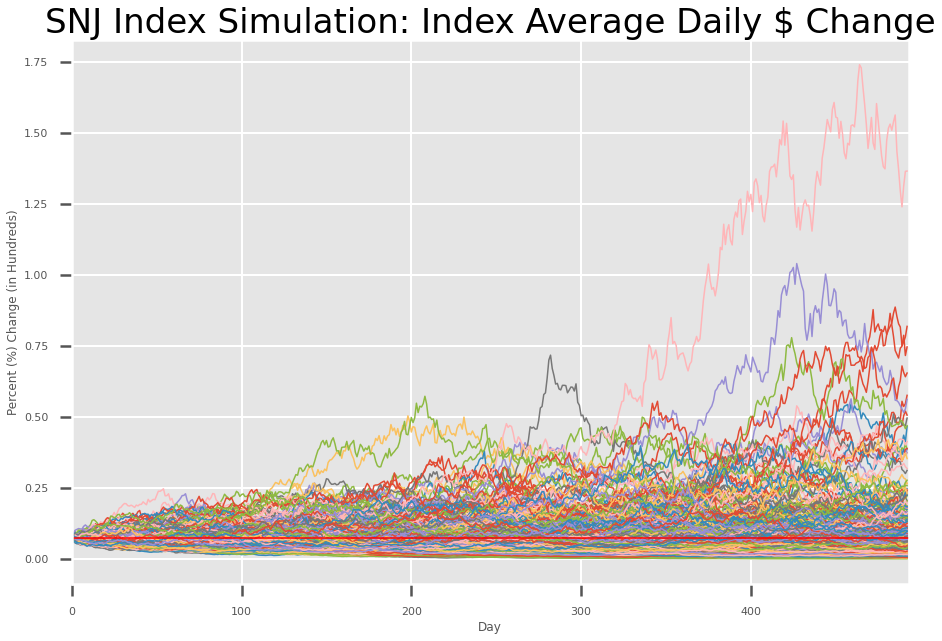

In [258]:
# SNJ Index Monte Carlo Plot

fig_index_monte = plt.figure(figsize=(15,10))
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.title('SNJ Index Simulation: Index Average Daily $ Change', fontsize = 34)
plt.xlabel('Day')
plt.xlim(0, 493)
plt.ylabel('Percent (%) Change (in Hundreds)')
#plt.ylim(1500, )
plt.show()

In [18]:
#Getting SNJ index Average EOY values
annual_values = (simulation_df).iloc[492].sort_values(ascending = False).round(4)
annual_values

419    1.3656
259    0.8191
126    0.7469
448    0.6549
105    0.5764
        ...  
406    0.0039
268    0.0035
311    0.0034
213    0.0032
320    0.0013
Name: 492, Length: 500, dtype: float64

In [19]:
#Get the Index values range; mean, median, max, min
#mean_round = round(annual_values.mean,2)

print(f'The Crypto Index Average Price % Change the Next 365 Days is {100*(annual_values.mean())} %')
print(f'The Crypto Index Median Price % Change the Next 365 Days is {100*(annual_values.median())} %')
print(f'The Crypto Index MAXIMUM Price % Change the Next 365 Days is {100*(annual_values.max())} %')
print(f'The Crypto Index LOWEST Price % Change the Next 365 Days is {100*(annual_values.min())} %')

The Crypto Index Average Price % Change the Next 365 Days is 7.685759999999994 %
The Crypto Index Median Price % Change the Next 365 Days is 4.29 %
The Crypto Index MAXIMUM Price % Change the Next 365 Days is 136.56 %
The Crypto Index LOWEST Price % Change the Next 365 Days is 0.13 %


<AxesSubplot:title={'center':'Plot of Simulated Outcome'}, xlabel='Price Range', ylabel='Deviation'>

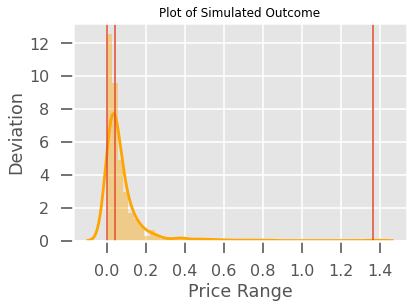

In [137]:
# Seaborn Chart
import seaborn as seabornInstance
import seaborn as sns
plt.style.use('seaborn-poster')
%matplotlib inline

fig_index_dist = seabornInstance.distplot(annual_values, color='orange')
#seabornInstance.JointGrid(annual_values, color='orange')
#sns.set_theme()
#sns.boxplot(data=annual_values, palette="deep")
#sns.set_style("whitegrid")
#sns.despine(left=True)
sns.set_context("poster", font_scale=.5, rc={"lines.linewidth": 1.5})
plt.axvline(x=annual_values.median())
plt.axvline(x=annual_values.max())
plt.axvline(x=annual_values.min())
plt.title('Plot of Simulated Outcome')
plt.xlabel('Price Range')
#plt.xlim(.5, 1.3)
plt.ylabel('Deviation')

fig_index_dist

<AxesSubplot:title={'center':'Swamplot of Simulated Outcome'}, xlabel='492'>

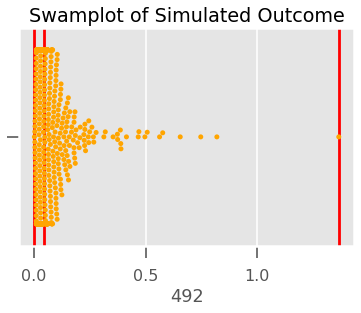

In [135]:
#Swarm plot of simulated SNJ data
import seaborn as seabornInstance
import seaborn as sns
plt.style.use('seaborn-poster')
%matplotlib inline

fig_index_swarm = seabornInstance.swarmplot(annual_values, color='orange')

plt.axvline(x=annual_values.median(), color='red')
plt.axvline(x=annual_values.max(), color='red')
plt.axvline(x=annual_values.min(), color='red')
plt.title('Swamplot of Simulated Outcome')

fig_index_swarm

# 6. Getting the New Cryptos in to Play
## Back to Monte Carlo and Beyond!

In [99]:
#testing values for getting additional cryptos from Yahoo finance
coti_p = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
ewt_p = web.DataReader('EWT-USD', 'yahoo', start, end) ['Close']
kda_p = web.DataReader('KDA-USD', 'yahoo', start, end) ['Close']

#cryto_choice = 
coti_p.pct_change().round(4)

Date
2020-01-01       NaN
2020-01-02   -0.0415
2020-01-03    0.0622
2020-01-04    0.1133
2020-01-05    0.0155
               ...  
2021-04-04   -0.0031
2021-04-05    0.1154
2021-04-06   -0.1540
2021-04-07    0.0392
2021-04-08    0.0028
Name: Close, Length: 437, dtype: float64

In [100]:
#get user input to create new_crypto variable
choice = input("Enter COTI, EWT or KDA: ")

if choice == 'COTI' :
    print("You chose COTI to project future performance") 
    #new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
elif choice == 'EWT' :
    print("You chose Energy Web to project future performance")
    #new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
elif choice == 'KDA' :
    print("You chose Kadena to project future performance")
    #new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
else:
    print("Invalid choice")

Enter COTI, EWT or KDA:  COTI


You chose COTI to project future performance


In [101]:
#assign value for new new_crypto_choice variable
if choice == 'COTI':
    new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
elif choice == 'EWT':
    new_crypto_choice = web.DataReader('EWT-USD', 'yahoo', start, end) ['Close']
elif choice == 'KDA':
    new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
else:
    print("Invalid crypto choice provided")

In [102]:
new_crypto_choice
new_crypto_returns = new_crypto_choice.pct_change().round(4)
new_crypto_returns

Date
2020-01-01       NaN
2020-01-02   -0.0415
2020-01-03    0.0622
2020-01-04    0.1133
2020-01-05    0.0155
               ...  
2021-04-04   -0.0031
2021-04-05    0.1154
2021-04-06   -0.1540
2021-04-07    0.0392
2021-04-08    0.0028
Name: Close, Length: 437, dtype: float64

# 5. NEW Simulation for New Crypto Values
### Back to Monte Carlo

In [110]:
#Make sure the required variables for the new crypto are avauilable
new_crypto_choice
new_crypto_returns = new_crypto_choice.pct_change().round(4)
new_crypto_returns
last_crpyto_price = new_crypto_choice[-1]

In [111]:
#number of sims
number_simulationsc = 500
number_daysc = 493

In [112]:
#Variable for new sim df
new_simulation_df = pd.DataFrame()

In [113]:
#Sim for the new crypto data
for x in range (number_simulationsc):
    count = 0
    daily_volatility_2 = new_crypto_choice.std()
    
    price_series_new = []
    
    price_new = last_crpyto_price * (1 + np.random.normal(0, daily_volatility_2))
    price_series_new.append(price)
    
    for y in range(number_daysc):
        if count == 462:
            break
        price_new = price_series_new[count] * (1 + np.random.normal(0, daily_volatility_2))
        price_series_new.append(price_new)
        count += 1
    
    new_simulation_df[x] = price_series_new     

In [145]:
new_simulation_df.head()

0         1         2         3         4         5         6    \
0  0.069885  0.069885  0.069885  0.069885  0.069885  0.069885  0.069885   
1  0.069779  0.074370  0.067837  0.073123  0.069721  0.062233  0.066571   
2  0.063711  0.062818  0.074168  0.074678  0.070987  0.062610  0.061765   
3  0.052025  0.074994  0.070370  0.078065  0.073433  0.057050  0.049811   
4  0.061883  0.076061  0.055479  0.082715  0.074146  0.051888  0.047725   

        7         8         9    ...       490       491       492       493  \
0  0.069885  0.069885  0.069885  ...  0.069885  0.069885  0.069885  0.069885   
1  0.065307  0.079438  0.075559  ...  0.068226  0.072543  0.065526  0.068717   
2  0.059605  0.079353  0.065891  ...  0.070145  0.062340  0.075095  0.069231   
3  0.054964  0.078469  0.063753  ...  0.082053  0.061235  0.078618  0.083958   
4  0.046416  0.083562  0.072043  ...  0.073673  0.061459  0.079521  0.077099   

        494       495       496       497       498       499  
0  0.069885  0.069885  0.069885  0.069885  0.069885  0.069885  
1  0.085302  0.071119  0.072417  0.075465  0.065796  0.060478  
2  0.089402  0.065864  0.069576  0.080635  0.060653  0.065527  
3  0.085264  0.070362  0.065983  0.082793  0.052001  0.061643  
4  0.099892  0.082985  0.070147  0.072412  0.054291  0.063651  

[5 rows x 500 columns]

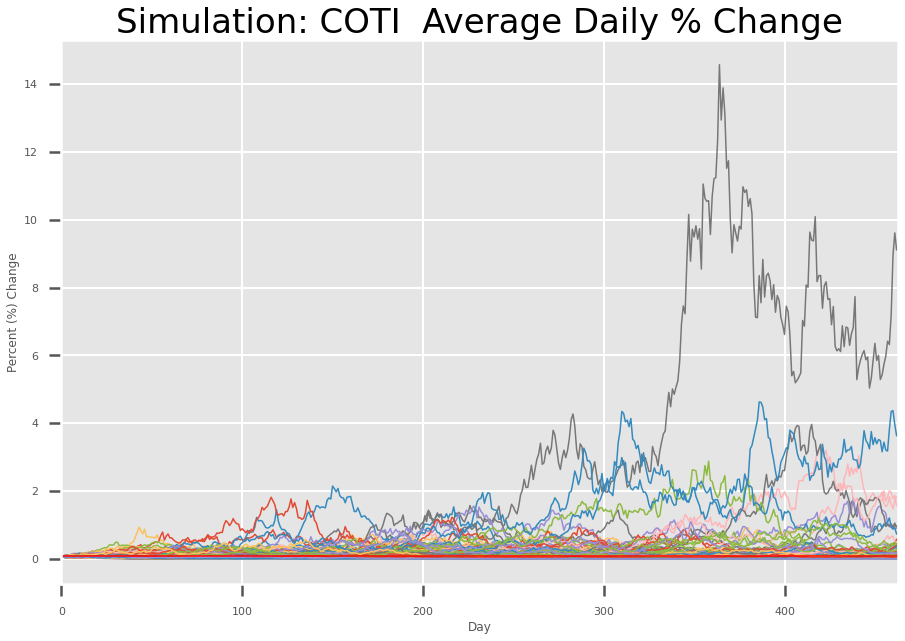

In [257]:
#Plot the Monte Carlo sim. and show for new crpyto
fig_crypto_monte = plt.figure(figsize=(15,10))
plt.plot(new_simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.title('Simulation: '+ choice + '  Average Daily % Change', fontsize = 34)
plt.xlabel('Day')
plt.xlim(0, 463)
plt.ylabel('Percent (%) Change')
#plt.ylim(1500, )
plt.show()

#fig_crypto_monte

In [118]:
#Getting Average EOY values for New Crypto
annual_values_c = (new_simulation_df).iloc[462].sort_values(ascending = False).round(4)
annual_values_c

59     9.1180
442    3.6341
377    1.8179
111    1.5689
241    0.9740
        ...  
168    0.0000
369    0.0000
479    0.0000
441    0.0000
81     0.0000
Name: 462, Length: 500, dtype: float64

In [119]:
#show the new crypto values range; mean, median, max, min

print(f'The NEW Crypto Average Price % Change the Next 365 Days is (+/-) {100*(annual_values_c.mean())} %')
print(f'The NEW Crypto Median Price % Change the Next 365 Days is (+/-) {100*(annual_values_c.median())} %')
print(f'The NEW Crypto MAXIMUM Price % Change the Next 365 Days is (+/-) {100*(annual_values_c.max())} %')
print(f'The NEW Crypto LOWEST Price % Change the Next 365 Days is (+/-) {100*(annual_values_c.min())} %')

The NEW Crypto Average Price % Change the Next 365 Days is (+/-) 6.428260000000026 %
The NEW Crypto Median Price % Change the Next 365 Days is (+/-) 0.445 %
The NEW Crypto MAXIMUM Price % Change the Next 365 Days is (+/-) 911.8000000000001 %
The NEW Crypto LOWEST Price % Change the Next 365 Days is (+/-) 0.0 %


<AxesSubplot:title={'center':'Plot of Simulated Outcome for New Crypto '}, xlabel='Price Range', ylabel='Deviation'>

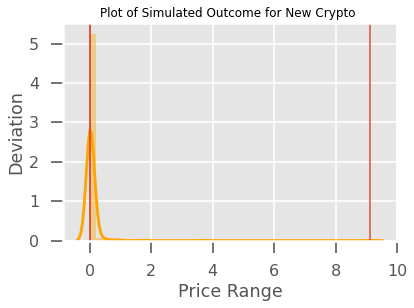

In [134]:
# Seaborn Chart
import seaborn as seabornInstance
import seaborn as sns
plt.style.use('seaborn-poster')
%matplotlib inline

fig_crypto_dist = seabornInstance.distplot(annual_values_c, color='orange')
#seabornInstance.JointGrid(annual_values, color='orange')
#sns.set_theme()
#sns.boxplot(data=annual_values, palette="deep")
#sns.set_style("whitegrid")
#sns.despine(left=True)
sns.set_context("poster", font_scale=.5, rc={"lines.linewidth": 1.5})
plt.axvline(x=annual_values_c.median())
plt.axvline(x=annual_values_c.max())
plt.axvline(x=annual_values_c.min())
plt.title('Plot of Simulated Outcome for New Crypto ' )
plt.xlabel('Price Range')
#plt.xlim(.5, 1.3)
plt.ylabel('Deviation')


fig_crypto_dist

<AxesSubplot:title={'center':'Swamplot of Simulated Outcome for New Crypto'}, xlabel='462'>

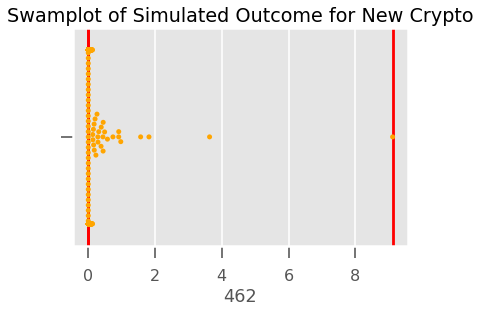

In [136]:
#Swarm plot of simulated New Crypto data
import seaborn as seabornInstance
import seaborn as sns
plt.style.use('seaborn-poster')
%matplotlib inline

fig_crypto_swarm = seabornInstance.swarmplot(annual_values_c, color='orange')

plt.axvline(x=annual_values_c.median(), color='red')
plt.axvline(x=annual_values_c.max(), color='red')
plt.axvline(x=annual_values_c.min(), color='red')
plt.title('Swamplot of Simulated Outcome for New Crypto')

fig_crypto_swarm

# 6. Dashboarding the Results

In [147]:
#Chart plots for dashboard
# Crypto percent change charts
""""
btc_percent()
eth_percent()
ltc_percent()
link_percent()
xrp_percent()
trx_percent()

### Crypto History Char
crypto_index_chart()

### SNJ Index Sims
fig_index_monte()
fig_index_dist()
fig_index_swarm()

### New Crypto Sims
fig_crypto_monte()
fig_crypto_dist()
fig_crypto_monte()
"""

'"\nbtc_percent()\neth_percent()\nltc_percent()\nlink_percent()\nxrp_percent()\ntrx_percent()\n\n### Crypto History Char\ncrypto_index_chart()\n\n### SNJ Index Sims\nfig_index_monte()\nfig_index_dist()\nfig_index_swarm()\n\n### New Crypto Sims\nfig_crypto_monte()\nfig_crypto_dist()\nfig_crypto_monte()\n'

In [224]:
# Dashboard Chart Plots
def snj_btc():
    return btc_percent()
def snj_eth():
    return eth_percent()

def cpt_port_choice():
    return crypto_index_chart()

# tab 2 charts
def index_monte():
    return fig_index_dist()

def index_dist():
    return fig_index_dist()

def index_swarm():
    fig_crypto_swarm = seabornInstance.swarmplot(annual_values_c, color='orange')

    plt.axvline(x=annual_values_c.median(), color='red')
    plt.axvline(x=annual_values_c.max(), color='red')
    plt.axvline(x=annual_values_c.min(), color='red')
    plt.title('Swamplot of Simulated Outcome for New Crypto')


    
    return fig_index_swarm()



def crypto_index_monte():
    return fig_index_monte

def new_crypto_monte():
    return fig_crypto_monte

In [270]:
# Dashboard Plot

import seaborn as seabornInstance
import seaborn as sns


crypto_portfolio_plots  = pn.Column(
    '## Chart Crypto Index Monte',
    pn.Row(
         
        btc_percent.opts(title='Bitcoin'), 
        eth_percent.opts(title='Ethereum'), 
        ltc_percent.opts(title='Litecoin'), ),
    pn.Row(
        link_percent.opts(title='Chainlink'), 
        xrp_percent.opts(title='Ripple'), 
        trx_percent.opts(title='Tron'), ),
    #pn.Row(
        #cpt_port_choice(),),
)

crypto_monte_plots1 = pn.Column(
    '# Chart SNJ Index Monte',
    '## This is a simulation of the cryptos making up the SNJ index, combined, and ran with the following:',
    '#### %Change of the Average Daily Close, over 463 days',
    ' Yes, we know it is a strange number',
    crypto_index_monte(),
    #pn.Row(
        #index_dist(),
        #fig_index_swarm(),)
)


crypto_monte_plots2 = pn.Column(
    '## Chart New Crypto Monte',
    pn.Row(
        'The NEW Crypto Average Price % Change the Next 365 Days is (+/-) 6.4282 % ',
        'The NEW Crypto Median Price % Change the Next 365 Days is ###(+/-) 0.445 %',),
    pn.Row(
        'The NEW Crypto MAXIMUM Price % Change the Next 365 Days is ###(+/-) 911.800 %',
        'The NEW Crypto LOWEST Price % Change the Next 365 Days is ###(+/-) 0.0001 %',),
    new_crypto_monte(),
)

dashboard = pn.Tabs(
    ('Crypto SNJ Index', crypto_portfolio_plots), 
    ('Crypto Index Dive', crypto_monte_plots1),
    ('New Crypto Dive ('+ choice + ')', crypto_monte_plots2)
)


Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(Curve)
            [1] HoloViews(Curve)
            [2] HoloViews(Curve)
        [2] Row
            [0] HoloViews(Curve)
            [1] HoloViews(Curve)
            [2] HoloViews(Curve)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Markdown(str)
        [3] Markdown(str)
        [4] Matplotlib(Figure)
    [2] Column
        [0] Markdown(str)
        [1] Row
            [0] Markdown(str)
            [1] Markdown(str)
        [2] Row
            [0] Markdown(str)
            [1] Markdown(str)
        [3] Matplotlib(Figure)
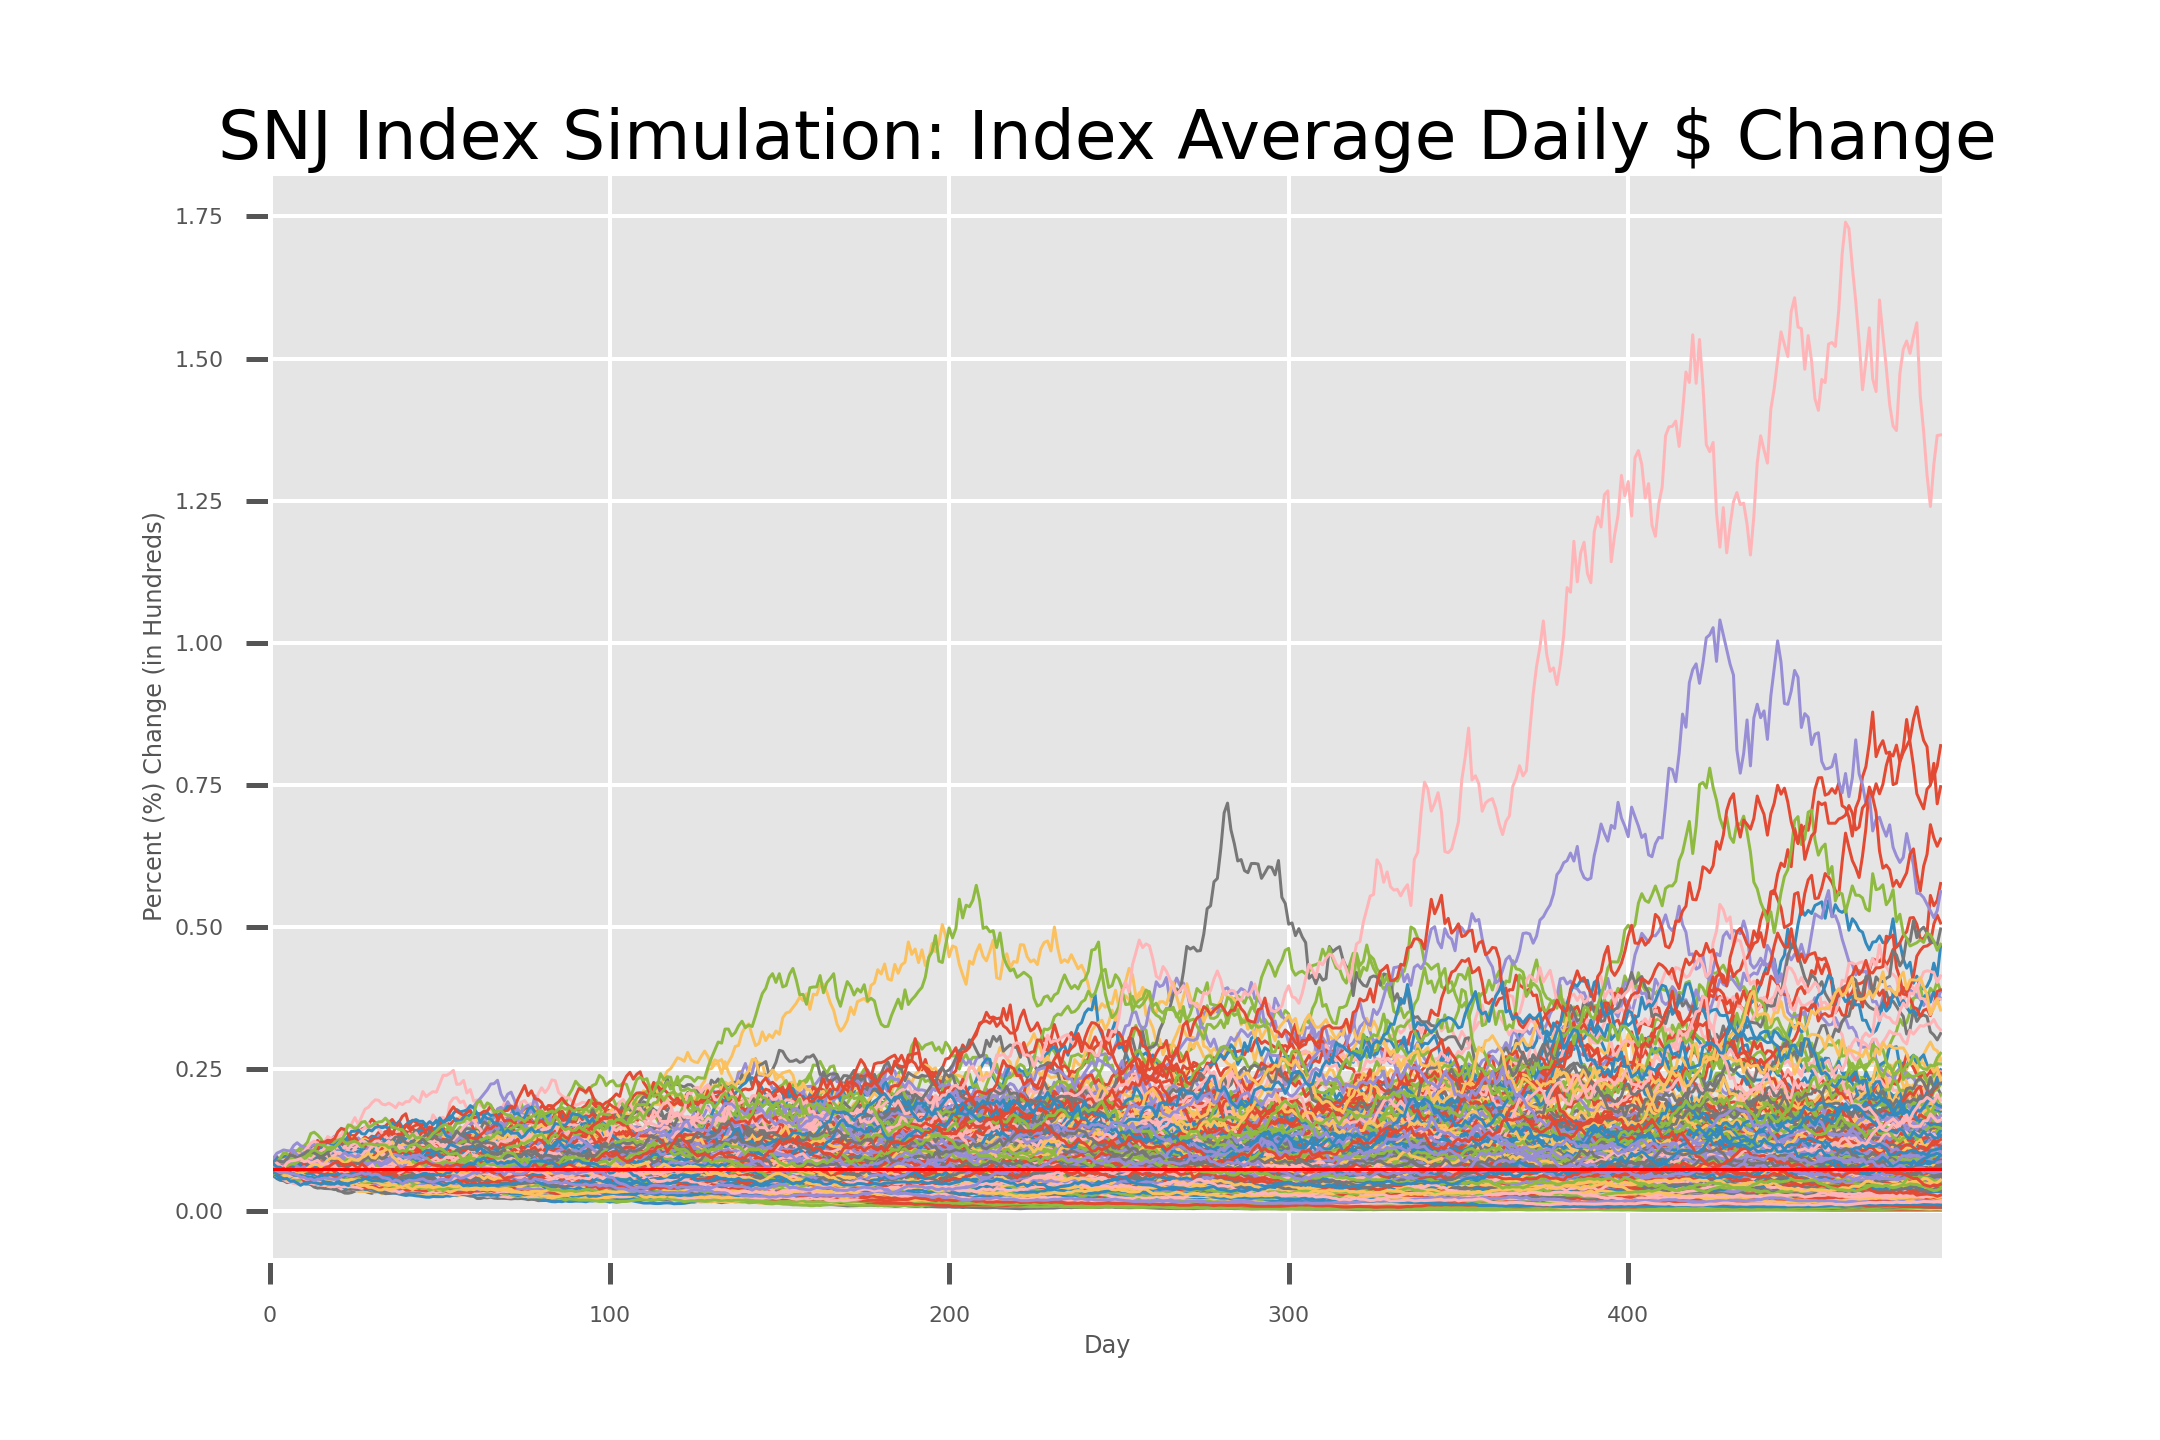
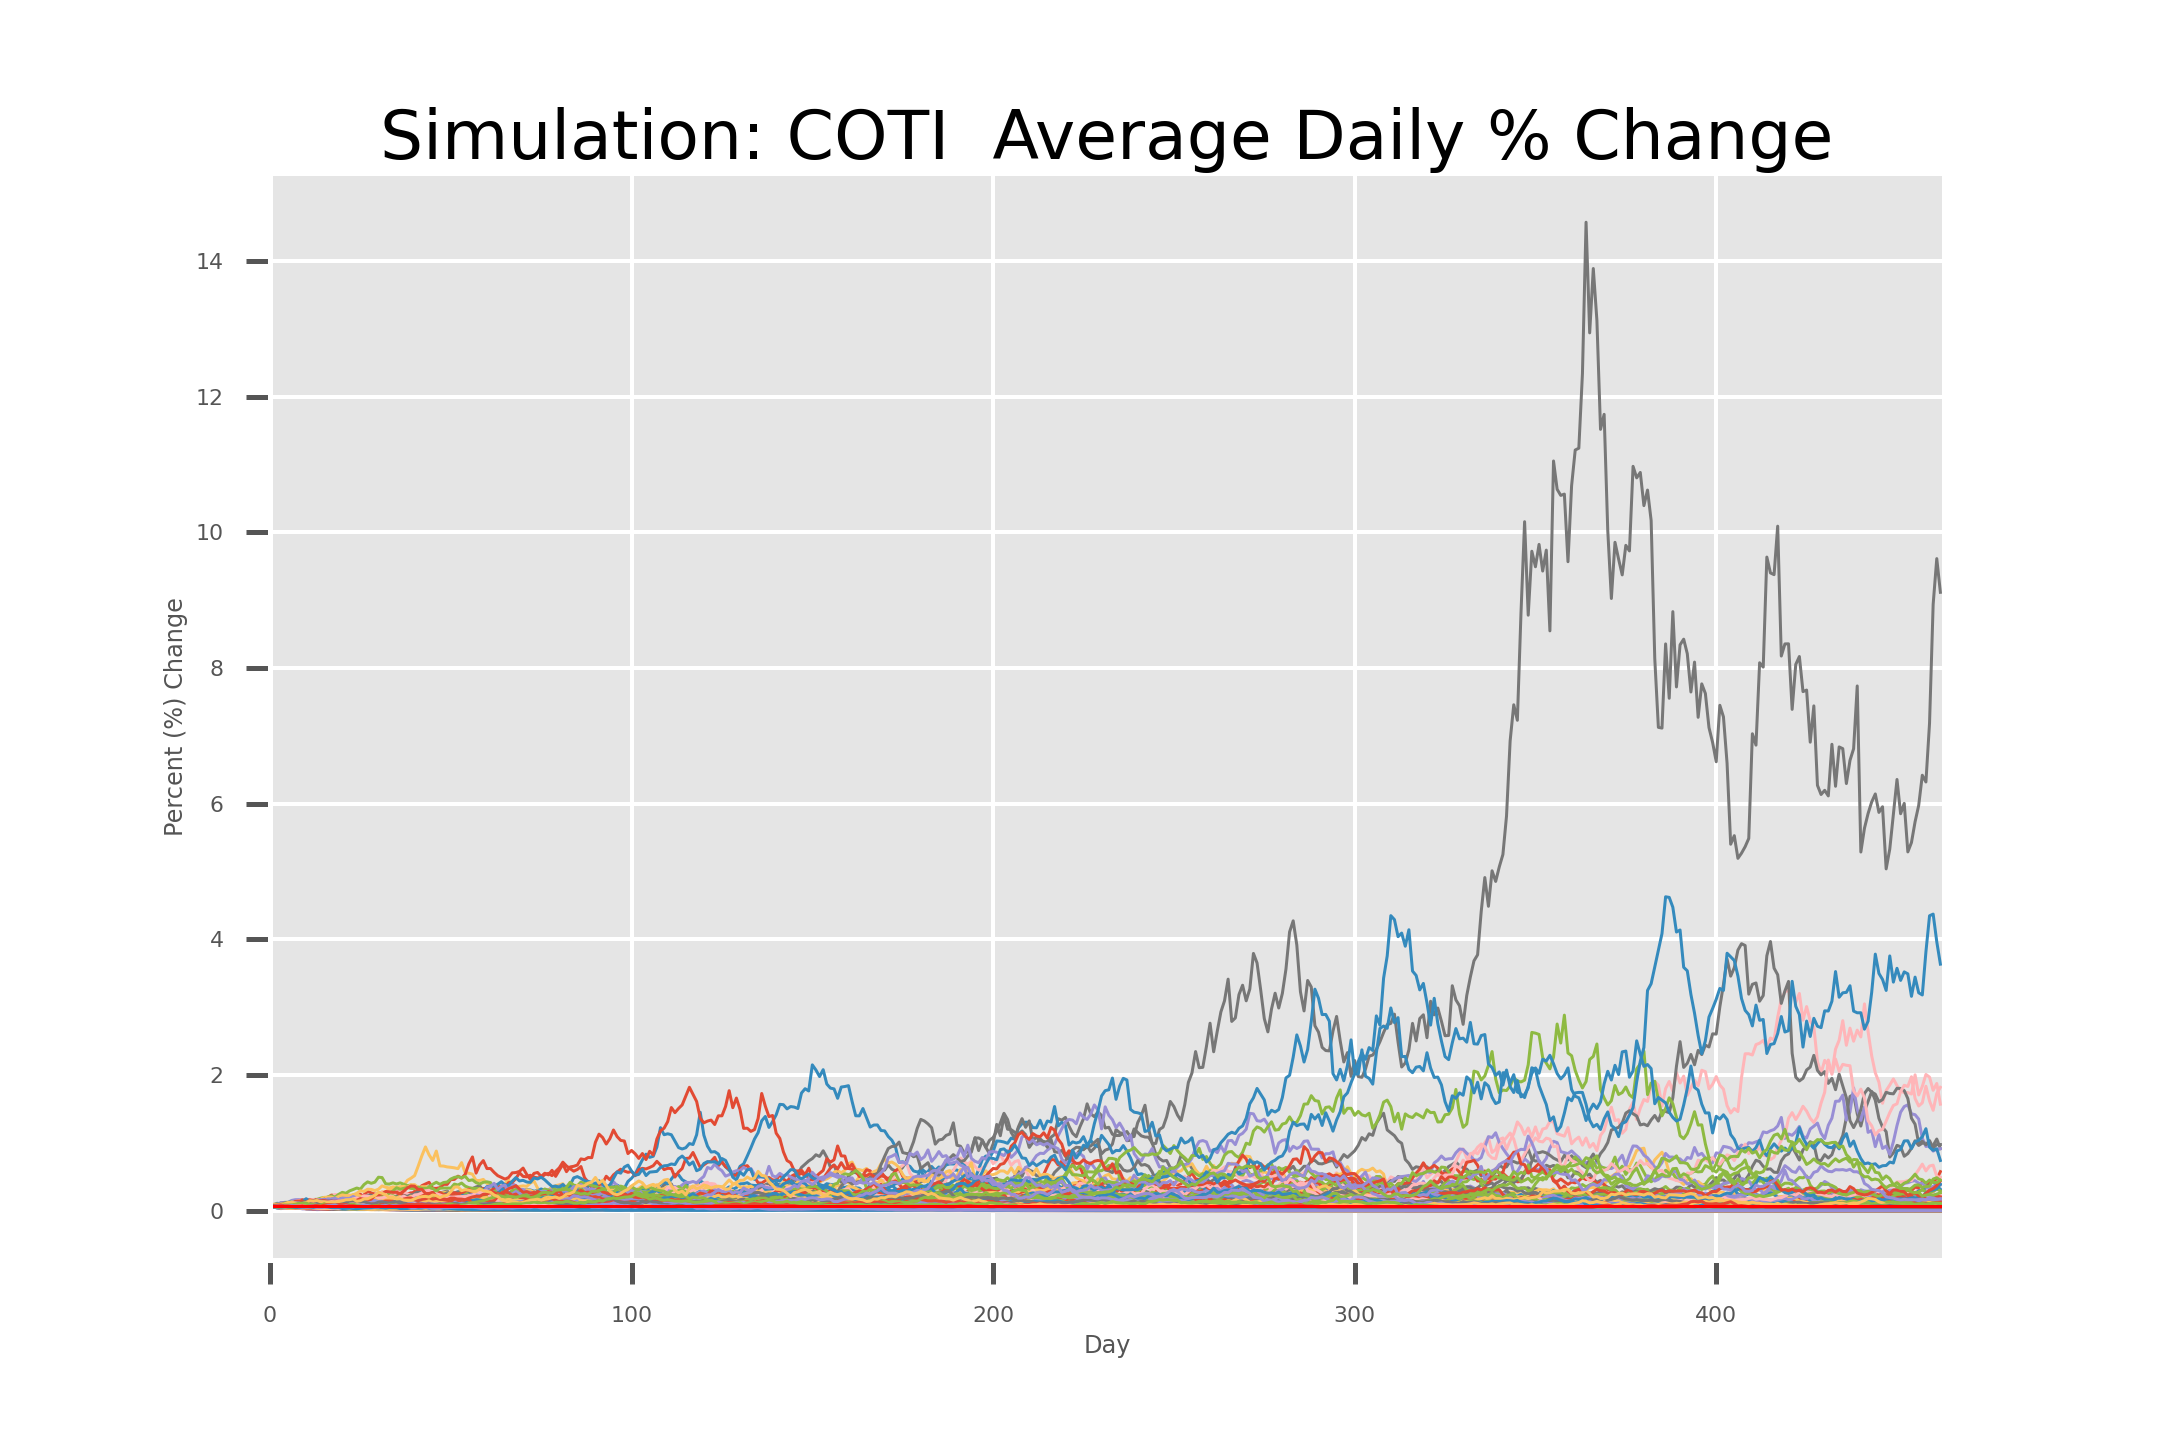

In [271]:
# Render the dashboard in Notebook
dashboard.servable()

In [255]:
# Render the dashboard in Browser tab to present
dashboard.show()

Launching server at http://localhost:64134
